In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline


/Users/albarron/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df = pd.read_csv("../Data/train.csv")

Walmart Sales Data

For the independent practice, we will analyze the weekly sales data from Walmart over a two year period from 2010 to 2012.

The data is again separated by store and by department, but we will focus on analyzing one store for simplicity.

The data includes:
    
    Store - the store number

    Dept - the department number

    Date - the week

    Weekly_Sales - sales for the given department in the given store

    IsHoliday - whether the week is a special holiday week

#### Load the data and set index to Date


In [3]:
df.shape
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

#### Filter the dataframe to Store 1 sales and aggregate over departments to compute the total sales per store. Let's call new dataset store1_sales and its variable "Weekly_Sales"


In [4]:
df[df.Store == 1][['Weekly_Sales']]

,Weekly_Sales
Date,
2010-02-05,24924.50
2010-02-12,46039.49
2010-02-19,41595.55
2010-02-26,19403.54
2010-03-05,21827.90
2010-03-12,21043.39
2010-03-19,22136.64
2010-03-26,26229.21
2010-04-02,57258.43


In [6]:
sone = df[df.Store == 1][['Weekly_Sales']].resample('W', 'sum').astype(float)
sone

,Weekly_Sales
Date,
2010-02-07,1643690.90
2010-02-14,1641957.44
2010-02-21,1611968.17
2010-02-28,1409727.59
2010-03-07,1554806.68
2010-03-14,1439541.59
2010-03-21,1472515.79
2010-03-28,1404429.92
2010-04-04,1594968.28


In [7]:
sone.shape

(143, 1)

#### Plot the Weekly_Sales. What general trends do you observe?


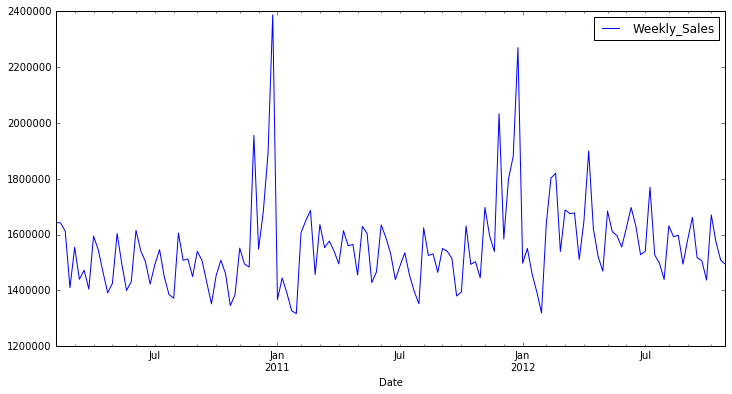

In [9]:
sone.plot(figsize=(12,6))

Answer: We can observe that close to Jan, sales increase.

#### Create an autocorrelation plot and explain your findings

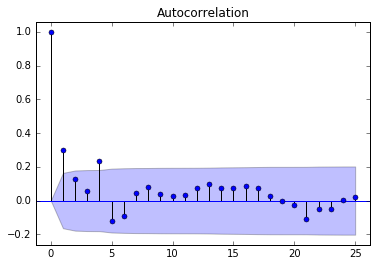

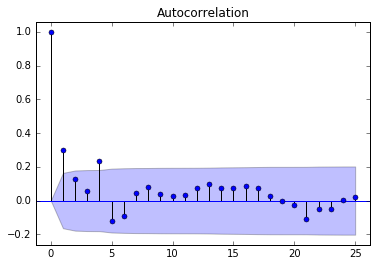

In [13]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(sone.Weekly_Sales, lags=25)

#### Split the weekly sales data in a training and test set - using 80% of the data for training

In [17]:
train = sone[:int(len(sone)*.8)] 
test = sone[int(len(sone)*.8):]

#### Create an AR(1) model on the training data and compute the mean absolute error of the predictions.

In [20]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

In [21]:
from statsmodels.tsa.arima_model import ARMA

sone_weekly = sone[['Weekly_Sales']].astype(float)
model = ARMA(sone_weekly, (1, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                     ARMA(1, 0)   Log Likelihood               -1905.530
Method:                       css-mle   S.D. of innovations         148170.138
Date:                Wed, 23 Mar 2016   AIC                           3817.060
Time:                        16:59:24   BIC                           3825.949
Sample:                    02-07-2010   HQIC                          3820.672
                         - 10-28-2012                                         
======================================================================================
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const               1.555e+06   1.77e+04     88.058      0.000      1.52e+06  1.59e+06
ar.L1.Weekly_Sales     0.3005      0.080      3.780      0.000         0.145     0.456
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.3273           +0.0000j            3.3273            0.0000
-----------------------------------------------------------------------------
"""

In [31]:
SE = (mean_absolute_error((test), model.predict(110,140)))**.5 #should be mean_square_error, not absolute
print SE

/Users/albarron/anaconda/lib/python2.7/site-packages/statsmodels/base/data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


ValueError: Found arrays with inconsistent numbers of samples: [29 31]

#### Plot the residuals - where are their significant errors.

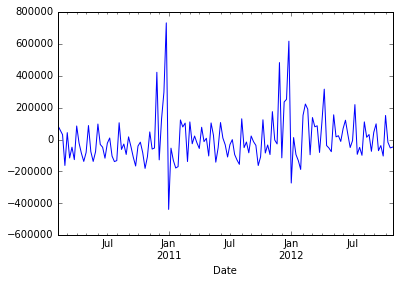

In [22]:
model.resid.plot()



Answer: Everything seems to be fine except end of DEC close to Jan.

#### Compute and AR(2) model and an ARIMA(3, 1,) model - does this improve your mean absolute error on the held out set.


In [23]:
from statsmodels.tsa.arima_model import ARMA

sone_weekly = sone[['Weekly_Sales']].astype(float)
model = ARMA(sone_weekly, (2, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                     ARMA(2, 0)   Log Likelihood               -1905.415
Method:                       css-mle   S.D. of innovations         148049.318
Date:                Wed, 23 Mar 2016   AIC                           3818.830
Time:                        17:00:52   BIC                           3830.682
Sample:                    02-07-2010   HQIC                          3823.646
                         - 10-28-2012                                         
======================================================================================
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const               1.555e+06   1.84e+04     84.688      0.000      1.52e+06  1.59e+06
ar.L1.Weekly_Sales     0.2885      0.083      3.463      0.001         0.125     0.452
ar.L2.Weekly_Sales     0.0399      0.083      0.480      0.632        -0.123     0.203
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.5596           +0.0000j            2.5596            0.0000
AR.2           -9.7871           +0.0000j            9.7871            0.5000
-----------------------------------------------------------------------------
"""

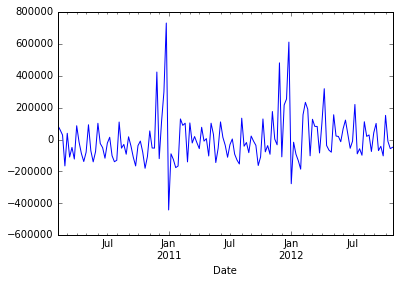

In [24]:
model.resid.plot()

In [25]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(sone_weekly, (3, 1, 1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.Weekly_Sales   No. Observations:                  142
Model:                 ARIMA(3, 1, 1)   Log Likelihood               -1894.878
Method:                       css-mle   S.D. of innovations         150588.507
Date:                Wed, 23 Mar 2016   AIC                           3801.756
Time:                        17:01:43   BIC                           3819.491
Sample:                    02-14-2010   HQIC                          3808.962
                         - 10-28-2012                                         
========================================================================================
                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                -1056.5574   5959.095     -0.177      0.860     -1.27e+04  1.06e+04
ar.L1.D.Weekly_Sales    -0.8601      0.133     -6.482      0.000        -1.120    -0.600
ar.L2.D.Weekly_Sales    -0.5704      0.102     -5.579      0.000        -0.771    -0.370
ar.L3.D.Weekly_Sales    -0.4576      0.075     -6.101      0.000        -0.605    -0.311
ma.L1.D.Weekly_Sales     0.3527      0.137      2.567      0.011         0.083     0.622
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1990           -0.0000j            1.1990           -0.5000
AR.2           -0.0238           -1.3498j            1.3500           -0.2528
AR.3           -0.0238           +1.3498j            1.3500            0.2528
MA.1           -2.8355           +0.0000j            2.8355            0.5000
-----------------------------------------------------------------------------
"""

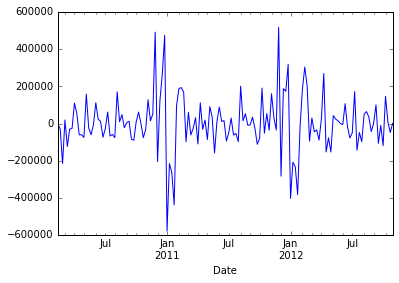

In [26]:
model.resid.plot()

/Users/albarron/anaconda/lib/python2.7/site-packages/statsmodels/tsa/arima_model.py:1847: FutureWarning: TimeSeries is deprecated. Please use Series
  forecast = TimeSeries(forecast, index=self.data.predict_dates)


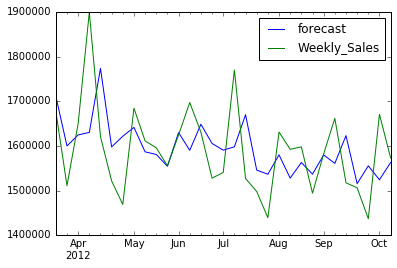

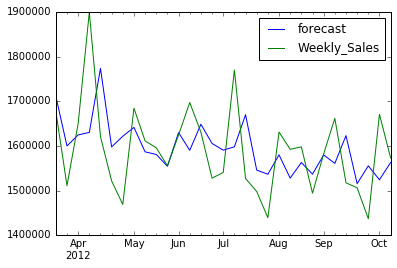

In [28]:
model.plot_predict(110,140)

#### Finally, compute an ARIMA model to improve your prediction error - iterate on the p, q, and parameters comparing the model's performance.


In [ ]:
p = range(0,5)
q = range(0,5)
d = range(0,3)

train = sone_weekly[:int(.75*len(sone_weekly))]
test = sone_weekly[int(.75*len(sone_weekly)):]

for i in p:
    for i in q:
        for i in d:
            model = ARIMA(sone_weekly, (3, 1, 1)).fit()
            model = ARIMA(train, (2, 0, 0)).fit()
model.summary()
predictions = model.predict(start = '2014-12-14',end = '2015-08-02')


Answer: It seems like 